In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np


In [7]:
# Import library yang diperlukan
import pandas as pd

# Load data dari file Excel
file_path = 'produksiPadi.xlsx'  # Sesuaikan path file Anda
data_padi = pd.read_excel(file_path)

# Tampilkan data awal
print("Data awal:")
print(data_padi.head())


Data awal:
   Tahun  Produksi Padi(Ton)
0   1970          18693649.0
1   1971          20483687.0
2   1972          19393933.0
3   1973          21490578.0
4   1974          22476073.0


In [8]:
# Menambahkan kolom lagging (Produksi tahun sebelumnya dan dua tahun sebelumnya)
data_padi['Produksi_Lag_1'] = data_padi['Produksi Padi(Ton)'].shift(1)
data_padi['Produksi_Lag_2'] = data_padi['Produksi Padi(Ton)'].shift(2)

# Menghapus baris dengan nilai NaN akibat lagging
data_padi = data_padi.dropna()

# Tampilkan data setelah lagging
print("\nData setelah lagging:")
print(data_padi.head())



Data setelah lagging:
   Tahun  Produksi Padi(Ton)  Produksi_Lag_1  Produksi_Lag_2
2   1972          19393933.0      20483687.0      18693649.0
3   1973          21490578.0      19393933.0      20483687.0
4   1974          22476073.0      21490578.0      19393933.0
5   1975          22339455.0      22476073.0      21490578.0
6   1976          23300939.0      22339455.0      22476073.0


In [9]:
# Menentukan fitur (X) dan target (y)
X = data_padi[['Produksi_Lag_1', 'Produksi_Lag_2']]
y = data_padi['Produksi Padi(Ton)']

print("\nFitur (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())



Fitur (X):
   Produksi_Lag_1  Produksi_Lag_2
2      20483687.0      18693649.0
3      19393933.0      20483687.0
4      21490578.0      19393933.0
5      22476073.0      21490578.0
6      22339455.0      22476073.0

Target (y):
2    19393933.0
3    21490578.0
4    22476073.0
5    22339455.0
6    23300939.0
Name: Produksi Padi(Ton), dtype: float64


In [10]:
from sklearn.model_selection import train_test_split

# Membagi data dengan rasio 70% training dan 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nJumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")



Jumlah data training: 35
Jumlah data testing: 16


In [11]:
from sklearn.linear_model import LinearRegression

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel berhasil dilatih.")



Model berhasil dilatih.


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Prediksi pada data testing
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("\nEvaluasi Model:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape * 100:.2f}%")



Evaluasi Model:
MSE: 37419072103668.56
RMSE: 6117113.05
MAPE: 5.67%


In [13]:
# Ambil data terakhir dari dataset
last_row = data_padi.iloc[-1]

# Prediksi produksi tahun 2023 berdasarkan data terakhir
produksi_2023 = model.predict([[last_row['Produksi Padi(Ton)'], last_row['Produksi_Lag_1']]])[0]

# Prediksi produksi tahun 2024 berdasarkan prediksi produksi 2023
produksi_2024 = model.predict([[produksi_2023, last_row['Produksi Padi(Ton)']]])[0]

print("\nPrediksi Produksi Padi:")
print(f"2023: {produksi_2023:.2f} Ton")
print(f"2024: {produksi_2024:.2f} Ton")



Prediksi Produksi Padi:
2023: 55296084.12 Ton
2024: 56327893.57 Ton


c:\Program Files\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Program Files\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


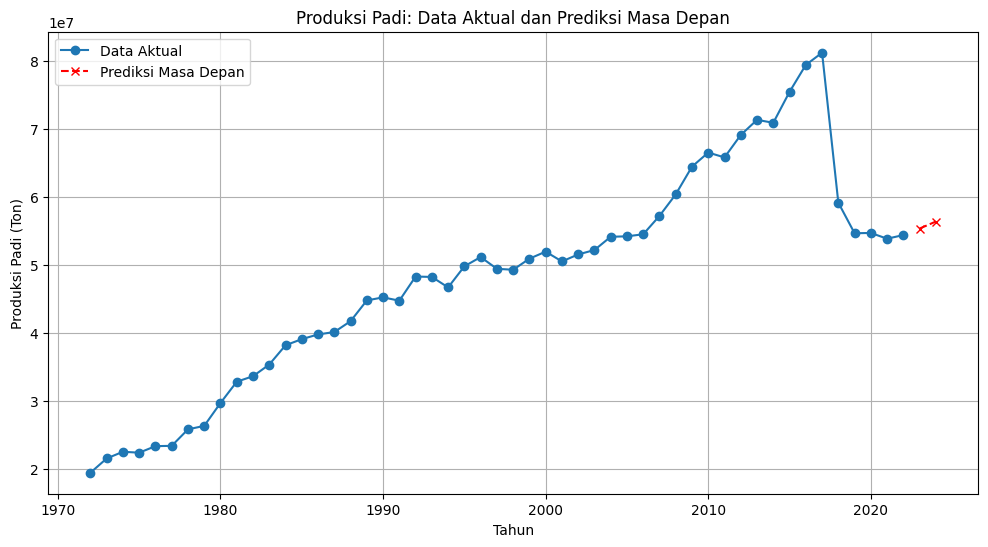

In [15]:
import matplotlib.pyplot as plt

# Menambahkan prediksi 2023 dan 2024 ke data
future_years = [2023, 2024]
future_produksi = [produksi_2023, produksi_2024]

# Data untuk plot
years = data_padi['Tahun'].tolist() + future_years
produksi = data_padi['Produksi Padi(Ton)'].tolist() + future_produksi

# Plot produksi termasuk prediksi
plt.figure(figsize=(12, 6))
plt.plot(data_padi['Tahun'], data_padi['Produksi Padi(Ton)'], label='Data Aktual', marker='o')
plt.plot(future_years, future_produksi, label='Prediksi Masa Depan', marker='x', color='red', linestyle='--')
plt.xlabel('Tahun')
plt.ylabel('Produksi Padi (Ton)')
plt.title('Produksi Padi: Data Aktual dan Prediksi Masa Depan')
plt.grid()
plt.legend()
plt.show()
